計算 Silhouette Score 獲得最佳分群數(依照Ward分群)

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("../distance_matrix.csv")
data=data.iloc[0:,1:]
data

,AASS,AATF,ABCB6,ABCG2,ABHD2,ABHD5,ABI2,ACO1,ACO2,ACSL6,...,ZNF671,ZNF687,ZNF703,ZNF84,LRRC1,SLC35F5,SMAGP,TMEM45A,FBXO16,HEATR6
0,0.000,0.656,0.862,0.778,0.822,0.722,0.633,0.723,0.827,0.839,...,0.786,0.666,0.670,0.706,0.293,0.531,0.212,0.212,0.212,0.756
1,0.656,0.000,0.720,0.622,0.724,0.537,0.362,0.355,0.752,0.695,...,0.721,0.359,0.357,0.398,0.474,0.531,0.000,0.000,0.000,0.000
2,0.862,0.720,0.000,0.359,0.798,0.794,0.787,0.715,0.850,0.530,...,0.804,0.715,0.783,0.719,0.480,0.313,0.627,0.627,0.627,0.416
3,0.778,0.622,0.359,0.000,0.787,0.695,0.566,0.677,0.837,0.525,...,0.824,0.672,0.649,0.686,0.514,0.313,0.000,0.000,0.000,0.675
4,0.822,0.724,0.798,0.787,0.000,0.505,0.715,0.725,0.790,0.829,...,0.803,0.736,0.728,0.754,0.515,0.402,0.457,0.457,0.457,0.675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,0.531,0.531,0.313,0.313,0.402,0.573,0.531,0.531,0.573,0.000,...,0.732,0.573,0.531,0.732,0.000,0.000,0.313,0.000,NaN,NaN
959,0.212,0.000,0.627,0.000,0.457,0.000,0.000,0.000,0.643,0.424,...,0.643,0.000,0.000,0.000,0.478,0.313,0.000,0.000,0.000,0.675
960,0.212,0.000,0.627,0.000,0.457,0.000,0.000,0.000,0.643,0.424,...,0.643,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.675
961,0.212,0.000,0.627,0.000,0.457,0.000,0.000,0.000,0.643,0.424,...,0.643,0.000,0.000,0.000,NaN,NaN,0.000,0.000,0.000,0.675


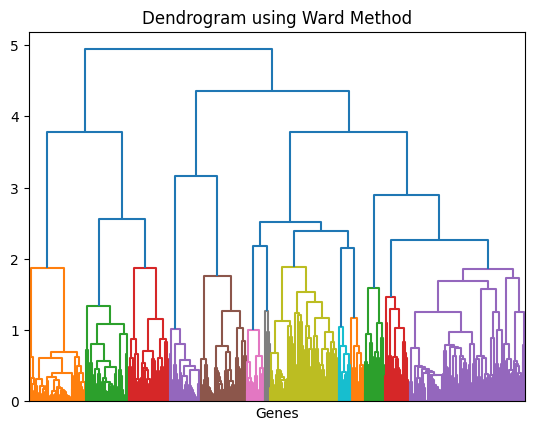

In [4]:
# replace NaN with 0
data = data.fillna(1)
condensed_data = squareform(data)
linkage_matrix = linkage(condensed_data, method='ward')

dendrogram(linkage_matrix, color_threshold=1.9)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Genes')
plt.title('Dendrogram using Ward Method')
plt.show()

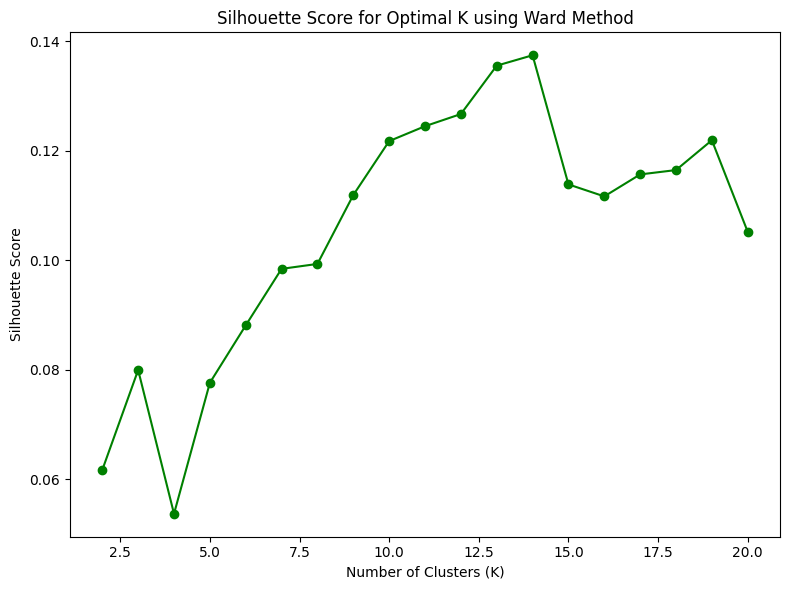

In [6]:
silhouette_scores = []

for k in range(2, 21):
    labels = fcluster(linkage_matrix, t=k, criterion='maxclust')
    silhouette_scores.append(silhouette_score(data, labels, metric='precomputed'))

fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(range(2, 21), silhouette_scores, marker='o', color='green')
ax1.set_title('Silhouette Score for Optimal K using Ward Method')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [7]:
labels = fcluster(linkage_matrix, t=14, criterion='maxclust')
df = pd.DataFrame()
df['Gene'] = data.columns
df['Cluster'] = labels
df.to_csv('ward_labels.csv', index=False)

使用Elbow method計算K-means最佳分群數

In [4]:
from sklearn.metrics import silhouette_score
from ipywidgets import interact

In [5]:
data=pd.read_csv("../result/all_beta_normalized_train_0.35.csv")
data=data.iloc[:,1:]

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3)
reduced_data_tsne = tsne.fit_transform(data)

kmeans = KMeans(n_clusters=4)  
clusters = kmeans.fit_predict(reduced_data_tsne)

elev_init, azim_init = 20, 30

@interact(elev=(0, 90, 5), azim=(0, 360, 5))
def visualize_3d_scatter(elev, azim):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    ax.set_title('t-SNE 3D Visualization with KMeans Clustering')
    ax.view_init(elev=elev, azim=azim)
    plt.show()


In [ ]:
inertia = []
silhouette_scores = []

for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_) # intertia 每個樣本到其分配的集群中心平方距離和，表示集群內的緊密度。
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


此數據為非凸形狀的群集，因此不適合使用k-means分群。Silhouette score理想情況是在某個K值達到峰值，隨著K值的增加而下降。